# Lab session 2 ---- Logistic Regression

Student: Boudissa Selma                     
Date:21/03/18

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## I. Introduction
In this exercise, we will implement logistic regression.
Note that you should have completed Lab1, and, in particular, understand the gradient descent algorithm.

## II. Logistic regression
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.
The file lab2data1.txt contains historical data from previous applicants. The first two columns correspond to the applicant’s scores on the two exams and the last column is the admission decision; a value equals to 0 means the applicant was not selected, while a value equals to 1 means that he/she was accepted.
Your task is to build a classifier that will estimate an applicant’s probability of admission based on his scores in the two exams.

### Solution Question 1

There is 100 samples and 2 features


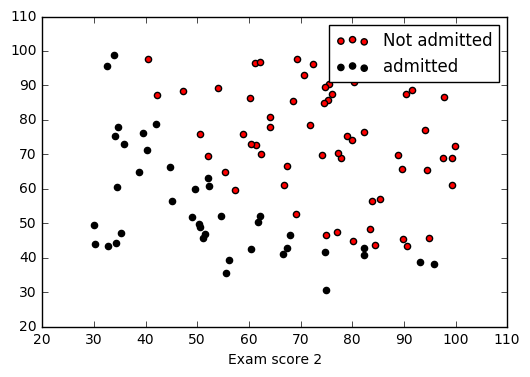

In [2]:

def plotData(X,y):
    idx = np.arange(0, X.shape[0])
    pos = idx [y == 1]
    neg = idx [y == 0]
    # plotting     
    plt.figure()
    plt.scatter(X[pos, 0], X[pos, 1], c='r', label='Not admitted')
    plt.scatter(X[neg, 0], X[neg, 1], c='k', label='admitted')
    plt.xlabel('Exam score 1')
    plt.xlabel('Exam score 2')
    plt.legend()
    plt.show()
    
# load the data
data = np.loadtxt("lab2data1.txt", delimiter=',')
#inpack the data
X = np.atleast_2d(data[:,:-1])
# target 
y = data[:,-1]
# print
print('There is {} samples and {} features'.format(X.shape[0],X.shape[1]))
plotData(X, y)

C:\Users\Selma\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


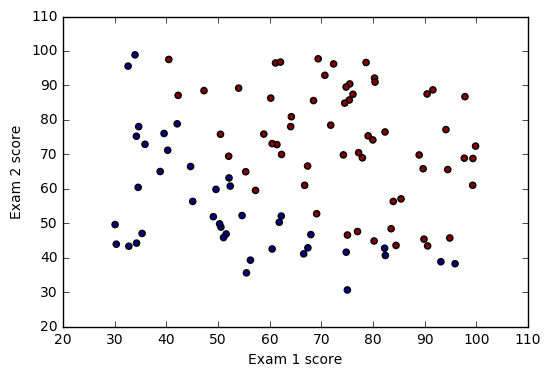

In [3]:
# other solution

# load the data
data = np.loadtxt("lab2data1.txt", delimiter=',')
X = np.atleast_2d(data[:, :-1])
y = data[:, -1]

X1 = data[:, 0]
X2 = data[:, 1]

#print the data
plt.scatter(X1,X2 , c=y , )
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()



### Solution Question 2

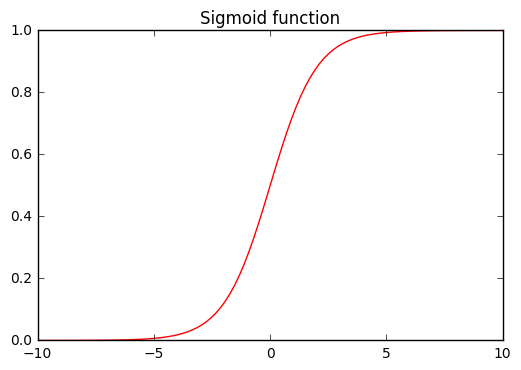

In [14]:
# Sigmoid function
def sigmoid(x):
    x =np.array(x).flatten()
    return (1/(1+np.exp(-x)))

x_tmp = np.linspace(-10,10,100)
y_tmp = sigmoid(x_tmp)

#plt.figure()
plt.plot(x_tmp, y_tmp,'r')
plt.title('Sigmoid function')
plt.show()

### Solution Question 3

In [5]:
def costfunction(theta, X, y, intercept=False):
    if intercept:
        X_ = np.asmatrix(X)
    else:
        intercept_array = np.ones((X.shape[0], 1))
        X_= (np.asmatrix(np.hstack((intercept_array, X))))
        n_samples = X_.shape[0]
        n_feature = X_.shape[1]
        hypothesis = sigmoid(X_.dot(theta).T)
    #print(n_samples)
        J = (1.0/n_samples) * np.sum(-y * np.log(hypothesis) - (1- y) * np.log(1- hypothesis))
    #print(hypothesis)
        return J 
     
        
        
def costFunction_der(theta, X, y, intercept=False):
    if intercept:
        X_ = np.asmatrix(X)
    else:
            intercept_array = np.ones((X.shape[0], 1))
            # add intercept
            X_ = np.asmatrix(np.hstack([intercept_array, X]))
          
            n_samples = X_.shape[0]
            n_feature = X_.shape[1]
            hypothesis = sigmoid(X_.dot(theta).T)
            error = hypothesis - y
          
            grad = []
          
            for i in range(0, theta.shape[0]):
                grad.append(1./n_samples * np.sum(error * (X_[:,i])))
    return grad 
            

In [6]:
[n_samples, n_features] = X.shape

initial_theta = np.zeros((n_features+1, 1))

cost = costfunction(initial_theta, X, y)
grad = costFunction_der(initial_theta, X, y)


print(cost)
print(grad)


0.69314718056
[-0.10000000000000001, -12.009216589291153, -11.262842205513593]


### Solution Question 4

In [27]:
#import scipy.optimize as opt
#Result = opt.minimize(fun = costfunction, x0 = initial_theta, args = (X,y), 
 #                             method = 'TNC', jac=costFunction_der)

#theta = Result.x

#print('The results from the optimization w ={}'.format(theta))


import scipy.optimize as opt
ncols = np.size(X, 1)
w_init = np.zeros((ncols + 1, 1))

w_allResults = opt.minimize(costfunction, w_init, args=(X, y), method='TNC', jac = costFunction_der)
w = w_allResults.x

print('The results from the optimization w ={}'.format(theta))
 

The results from the optimization w =[-25.16131859   0.20623159   0.20147149]


### Solution Question 5

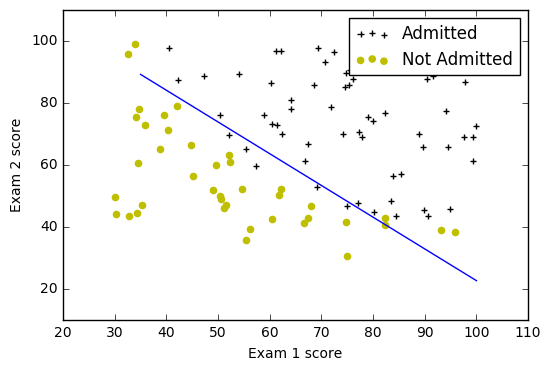

In [28]:
# Teacher's code
#def plotDecisionBoundary(theta, X, y, option):
 #   idx = np.arrange(0, X.shape[0])
#  pos = idx [y == 1]
#    neg = idx [y == 0]
#    #plot the figure
#    plt.scatter(X[pos, 0], X[pos, 1], c='r')
#    plt.scatter(X[neg, 0], X[neg, 1], c='k')
    #
#    plt.xlabel('Exam score 1')
#    plt.ylabel('Exam score 2')
    
#    if option =='line':
        
#        plot_x = np.array([min(X[:,1])-2, max(x[:,1])+2])
#        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
#        print(plot_x)
#        print(plot_y)
#        plt.plot(plot_x, plot_y)
       
#        plot.show()
        


#Data with positive labels (label = 1)
idx = (y == 1)
Xpos = X[idx,:]
p1 = plt.scatter(Xpos[:,0], Xpos[:,1], marker = '+', color = 'k')

#Data with negative labels (label = 0)
idx = (y == 0)
Xneg = X[idx,:]
p2 = plt.scatter(Xneg[:,0], Xneg[:,1], marker = 'o', color = 'y')

# Create scatter plot of the labelled datapoints
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend([p1, p2], ["Admitted", "Not Admitted"])

# plot the decision boundary
x_w = np.linspace(35.0, 100.0, num = 1000)
y_w = -(w[0] + w[1]*x_w)/w[2] 

plt.plot(x_w, y_w)

plt.show()

     
        
        

### Solution Question 6

In [50]:
# prediction function 
# this function will determine if the candidate get admitted or not.

def predict (theta, X):
    m = np.size(X,1)
    p = np.zeros(m,1)
    z = X*theta
    for i in range (1,m):
        if (sigmoid(z[i])== 0.5):
            p[i]=1
        else:
            p[i]=0
    return

#display the result


#prob = sigmoid([45 85]*theta);
print('The admission prob is equal to {}'.format(X))

The admission prob is equal to [[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]
 [ 45.08327748  56.31637178]
 [ 61.10666454  96.51142588]
 [ 75.02474557  46.55401354]
 [ 76.0987867   87.42056972]
 [ 84.43281996  43.53339331]
 [ 95.86155507  38.22527806]
 [ 75.01365839  30.60326323]
 [ 82.30705337  76.4819633 ]
 [ 69.36458876  97.71869196]
 [ 39.53833914  76.03681085]
 [ 53.97105215  89.20735014]
 [ 69.07014406  52.74046973]
 [ 67.94685548  46.67857411]
 [ 70.66150955  92.92713789]
 [ 76.97878373  47.57596365]
 [ 67.37202755  42.83843832]
 [ 89.67677575  65.79936593]
 [ 50.53478829  48.85581153]
 [ 34.21206098  44.2095286 ]
 [ 77.92409145  68.97235999]
 [ 62.27101367  69.95445795]
 [ 80.19018075  44.82162893]
 [ 93.1143888   38.80067034]
 [ 61.83020602  50.25610789]
 [ 38.7858038   64.99568096]
 [ 61.37928945  72.80788731]
 [ 85.40451939  57.05198398]
 [ 52.10797973  63.12762377]
 [ 52.045404

### III. Logistic regression with regularization
In this part, we will see the full power of logistic regression. Suppose that you are the production manager of a factory that produces microchips. After production, each microchip goes through various tests to ensure it functions correctly.
The file lab2data2.txt contains test results for some microchips on two tests. The first two columns correspond to the tests results, and the last column indicates whether the microchip should be accepted or not; 0 means rejected while 1 means accepted.
Using your function plotData(X,y), you can visualize the training data. As can be seen in Figure 3, this data is clearly not linearly separable, so a straight-forward application of logistic regression will not find a good decision boundary.

### Solution Question 1

### Solution Question 2

### Solution Question 3

### Solution Question 4